In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [2]:
heart = pd.read_csv("heart.csv")
heart.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart.shape

(303, 14)

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
attribute_features = [feature for feature in heart.columns if heart[feature].nunique() < 10]
attribute_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [6]:
continous_features = [feature for feature in heart.columns if feature not in attribute_features]
continous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### Box plot for visuaizing Outliers

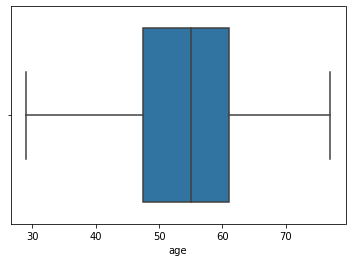

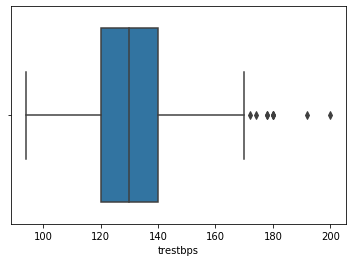

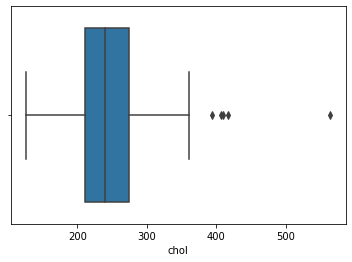

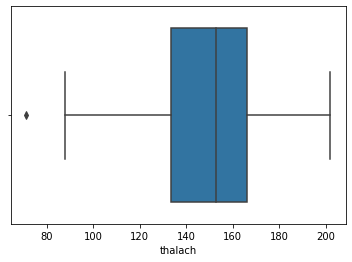

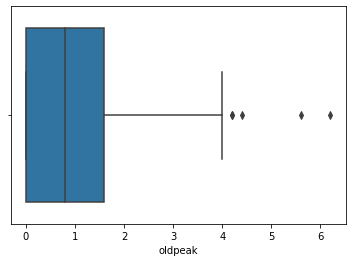

In [7]:
for features in continous_features:
    sns.boxplot(heart[features])
    plt.show()

### Feature age has no outliers, other continous features have outliers

## Outliers for different features

### 1. trestbps

In [8]:
Q3_trestbps, Q1_trestbps = heart["trestbps"].quantile([.75, .25])
IQR_trestbps = Q3_trestbps - Q1_trestbps
factor_trestbps = IQR_trestbps*1.5


In [9]:
heart[heart["trestbps"] > Q3_trestbps+factor_trestbps]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0


In [10]:
heart[heart["trestbps"] < Q1_trestbps-factor_trestbps]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


### 2. Chol

In [11]:
Q3_chol, Q1_chol = heart["chol"].quantile([.75, .25])
IQR_chol = Q3_chol - Q1_chol
factor_chol = IQR_chol*1.5


In [12]:
heart[heart["chol"] < Q1_chol-factor_chol]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [13]:
heart[heart["chol"] > Q3_chol+factor_chol]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


### 3. thalach

In [14]:
Q3_thalach, Q1_thalach = heart["thalach"].quantile([.75, .25])
IQR_thalach = Q3_thalach - Q1_thalach
factor_thalach = IQR_thalach*1.5


In [15]:
heart[heart["thalach"] < Q1_thalach-factor_thalach]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [16]:
heart[heart["thalach"] > Q3_thalach+factor_thalach]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


### 4. Oldpeak

In [17]:
Q3_oldpeak, Q1_oldpeak = heart["oldpeak"].quantile([.75, .25])
IQR_oldpeak = Q3_oldpeak - Q1_oldpeak
factor_oldpeak = IQR_oldpeak*1.5


In [18]:
heart[heart["oldpeak"] < Q1_oldpeak-factor_oldpeak]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [19]:
heart[heart["oldpeak"] > Q3_oldpeak+factor_oldpeak]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


## NORMALITY

### We will use Kernel Density estimate plot and Histograms to have an idea about the distribution of the continous features.

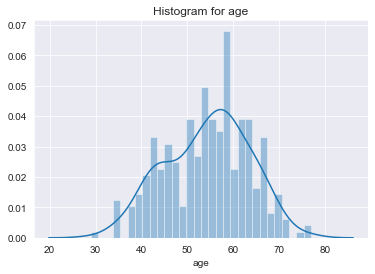

In [20]:
# 1. Age
sns.set_style("darkgrid")
bins = 30
sns.distplot(heart["age"], bins = bins)
plt.xlabel("age")
plt.title("Histogram for age")
plt.show()

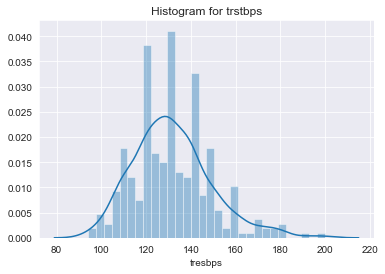

In [21]:
# 2. trstbps
sns.set_style("darkgrid")
bins = 30
sns.distplot(heart["trestbps"], bins = bins)
plt.xlabel("tresbps")
plt.title("Histogram for trstbps")
plt.show()

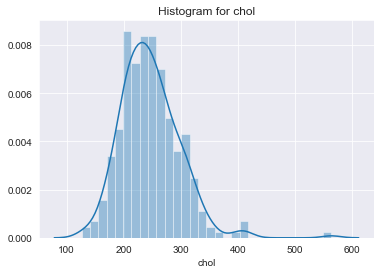

In [22]:
# 3. chol
sns.set_style("darkgrid")
bins = 30
sns.distplot(heart["chol"], bins = bins)
plt.xlabel("chol")
plt.title("Histogram for chol")
plt.show()

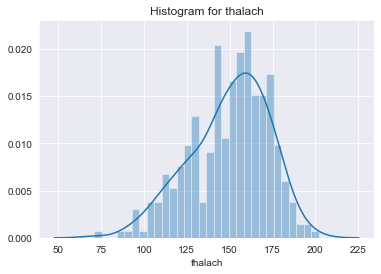

In [23]:
# 4. thalach
sns.set_style("darkgrid")
bins = 30
sns.distplot(heart["thalach"], bins = bins)
plt.xlabel("thalach")
plt.title("Histogram for thalach")
plt.show()

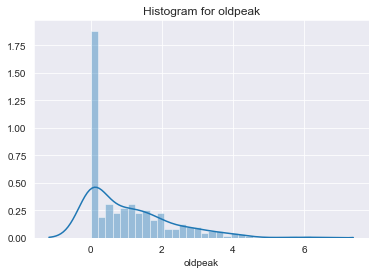

In [24]:
# 5. oldpeak
sns.set_style("darkgrid")
bins = 30
sns.distplot(heart["oldpeak"], bins = bins)
plt.xlabel("oldpeak")
plt.title("Histogram for oldpeak")
plt.show()

## Normality Tests using Kolmogorov-Smirnov test

In [25]:
# H0: The values are sampled from a population that follows Normal Distribution
import random


In [26]:
def kolmogorov_smirnov_test(feature, alpha, test):
    random.seed(101)
    sample = random.sample(list(heart[feature]), 100)
    D, p_value = stats.kstest(sample, test)
    print("P_value is ", p_value)
    if p_value < alpha:
        print("We reject Null hypothesis, that is data is not from a normal distribution")
    else:
        print("We fail to reject Null hypothesis, hence we can say data is coming from a normal distribution")

In [27]:
kolmogorov_smirnov_test("oldpeak", 0.05, "norm")

P_value is  1.2131434371817858e-23
We reject Null hypothesis, that is data is not from a normal distribution


In [28]:
kolmogorov_smirnov_test("thalach", 0.05, "norm")

P_value is  0.0
We reject Null hypothesis, that is data is not from a normal distribution


In [29]:
kolmogorov_smirnov_test("chol", 0.05, "norm")

P_value is  0.0
We reject Null hypothesis, that is data is not from a normal distribution


In [30]:
kolmogorov_smirnov_test("trestbps", 0.05, "norm")

P_value is  0.0
We reject Null hypothesis, that is data is not from a normal distribution


In [31]:
kolmogorov_smirnov_test("age", 0.05, "norm")

P_value is  0.0
We reject Null hypothesis, that is data is not from a normal distribution


## Normality tests using Shapiro-Wilk test

In [32]:
def shapiro_wilk_test(feature, alpha):
    random.seed(101)
    sample = random.sample(list(heart[feature]), 100)
    w, p_value = stats.shapiro(sample)
    print("P_value is ", p_value)
    if p_value < alpha:
        print("We reject Null hypothesis, that is data is not from a normal distribution")
    else:
        print("We fail to reject Null hypothesis, hence we can say data is coming from a normal distribution")

In [33]:
shapiro_wilk_test("age", 0.05)

P_value is  0.009441138245165348
We reject Null hypothesis, that is data is not from a normal distribution


In [34]:
shapiro_wilk_test("trestbps", 0.05)

P_value is  0.00788639672100544
We reject Null hypothesis, that is data is not from a normal distribution


In [35]:
shapiro_wilk_test("chol", 0.05)

P_value is  0.008909933269023895
We reject Null hypothesis, that is data is not from a normal distribution


In [36]:
shapiro_wilk_test("thalach", 0.05)

P_value is  0.02180757001042366
We reject Null hypothesis, that is data is not from a normal distribution


In [37]:
shapiro_wilk_test("oldpeak", 0.05)

P_value is  1.0505253555948002e-07
We reject Null hypothesis, that is data is not from a normal distribution


#### Conclusion : None of the features can be said to be Normally distributed

### From histogram we can see all the features are skewed, so we use Logarithmic transformation for positively skewed features

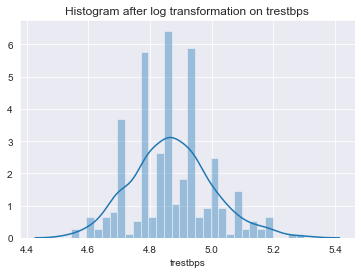

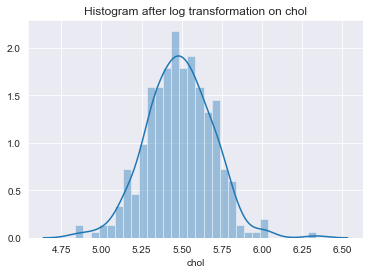

In [38]:
positively_skewed = ["trestbps", "chol", "oldpeak"]
for feature in positively_skewed:
    data = heart.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        sns.distplot(data[feature], bins = 30)
        plt.title("Histogram after log transformation on " + feature)
        plt.show()

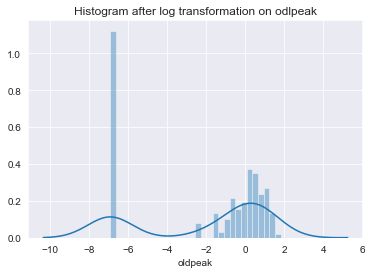

In [39]:
data = heart.copy()
data["oldpeak"] = np.log(data["oldpeak"]+.001)
sns.distplot(data["oldpeak"], bins = 30)
plt.title("Histogram after log transformation on odlpeak" )
plt.show()

### Boxcox transformation for negetively skewed features

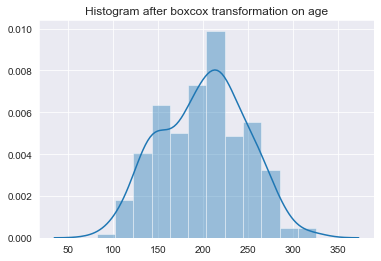

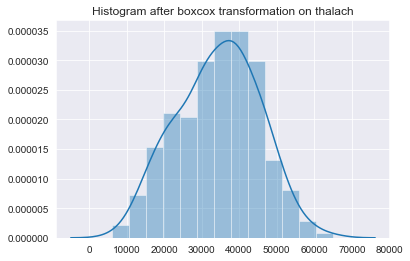

In [40]:
negtively_skewed = ['age','thalach']
for feature in negtively_skewed:
    data = heart.copy()
    #data[feature] = stats.boxcox(list(data[feature]))
    sns.distplot(stats.boxcox(list(data[feature]))[0])
    plt.title("Histogram after boxcox transformation on " + feature)
    plt.show()


#### After using the above transformations and looking at the histograms and kde plot we can see the that the data has become more symmetric and non normality is reduced. Further tests can be done to check the normality.

### More data pre-processing techniques

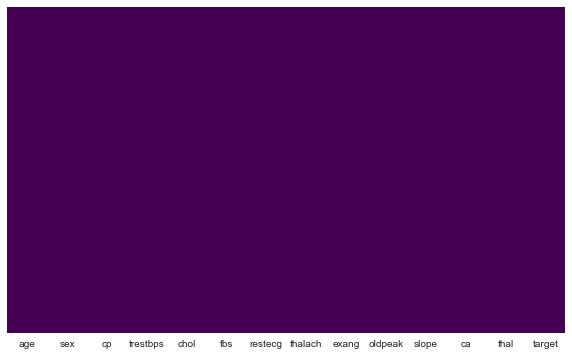

In [41]:
plt.figure(figsize = (10, 6))
sns.heatmap(heart.isnull(), yticklabels = False, cbar = False, cmap = "viridis")

#### We can clearly see from the heatmap no data is missing

### We can also scale our data (machine learning models perform better on scaled data).
#### Some popular scaling methods are min_max scaling, standard scaling.

In [42]:
# Min_max scaling
transformed_data = heart.copy()

In [43]:
for feature in continous_features:
    maxim = max(transformed_data[feature])
    minim = min(transformed_data[feature])
    transformed_data[feature] = (transformed_data[feature]-minim)/(maxim-minim)

In [44]:
transformed_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2,1


In [45]:
# Standard Scaling

In [46]:
standard_scaled_data = heart.copy()

In [47]:
for feature in continous_features:
    mean = np.mean(standard_scaled_data[feature])
    sd = pow(np.var(standard_scaled_data[feature]), .5)
    standard_scaled_data[feature] = (standard_scaled_data[feature] - mean)/sd

In [48]:
standard_scaled_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1
